In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv")

numrows = 25549

decision_tree_df = pd.DataFrame({"today" : [0.0]*numrows,
                                "tomorrow" : [True]*numrows})

seq = ["today",
      "tomorrow"]

decision_tree_df = decision_tree_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    decision_tree_df.iat[i,1] = tomorrow
    decision_tree_df.iat[i,0] = today
    
decision_tree_df = decision_tree_df.dropna()

In [2]:
decision_tree_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [3]:
from sklearn import tree

x = decision_tree_df.today.values
y = decision_tree_df.tomorrow.values
x = x.reshape(decision_tree_df.shape[0],1)

In [4]:
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(x,y)

In [6]:
score = clf.score(x,y)
print(score)

0.7129883347686526


In [8]:
from sklearn import metrics
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y,predictions)
print(cm)

[[11461  3183]
 [ 4149  6753]]


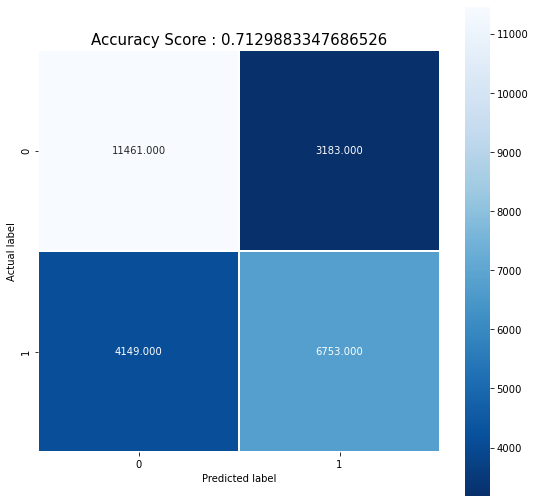

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True , fmt=".3f" , linewidths=.5 , square = True , cmap = "Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score : {0}".format(score)
plt.title(all_sample_title , size = 15);

In [11]:
dotfile = open("dt.dot" , "w")
tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()